In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy.linalg as npl
from scipy.optimize import minimize
import math as math
from itertools import combinations
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

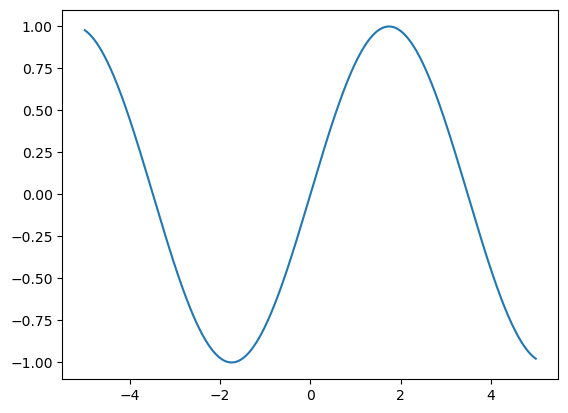

In [3]:
# The true function 
def f(x):
    return np.sin(0.9*x)

x = np.linspace(-5,5,1000)

plt.plot(x,f(x))
plt.show()

In [83]:
def Kernel(a,b,sigma,l):
    # we take len(a) = len(b)
    n= len(a)
    q= len(b)
    sqrdist = np.zeros((n,q))
    for j in range(0,n):
        for i in range(0,q):
           sqrdist[j,i] = (a[j]-b[i])**2 
    return sigma*np.exp(-1/(2*l**2)*(sqrdist))

In [85]:
def GPR(xtest,xtrain,Nobs,sigma,l):
    y = f(xtrain)
    A = Kernel(xtrain,xtrain,sigma,l)
    Ainv =np.linalg.inv(A)
    fstar = Kernel(xtest,xtrain,sigma,l)@Ainv@y
    varf = Kernel(xtest,xtest,sigma,l)-Kernel(xtest,xtrain,sigma,l)@Ainv@Kernel(xtrain,xtest,sigma,l)
    varfxtest = varf.diagonal()
    std=np.sqrt(np.abs(varfxtest))
    return fstar,std

## Just to Observe. Varying the check points

1.020040974783588
0.438467517717791
0.8041091751184466
0.8041091751184466
0.438467517717791
1.020040974783588


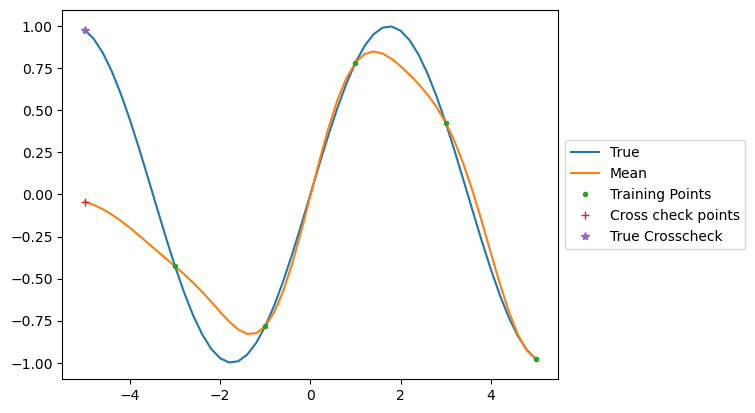

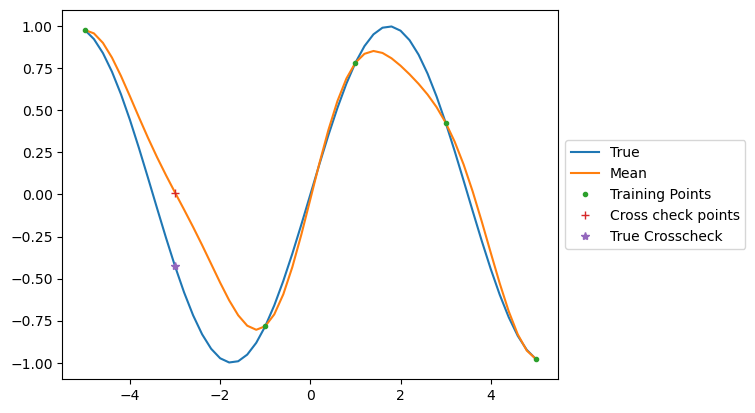

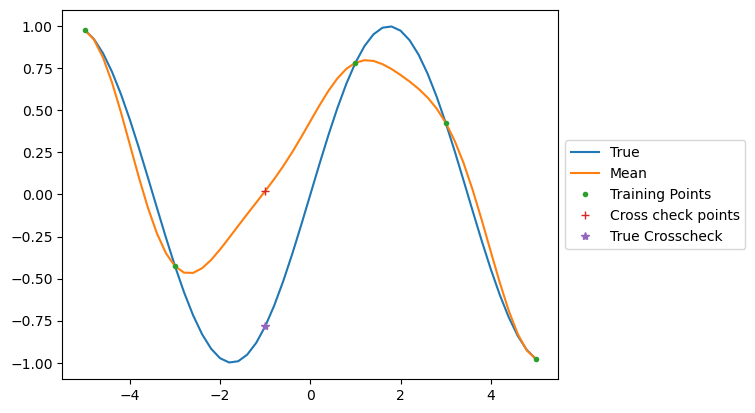

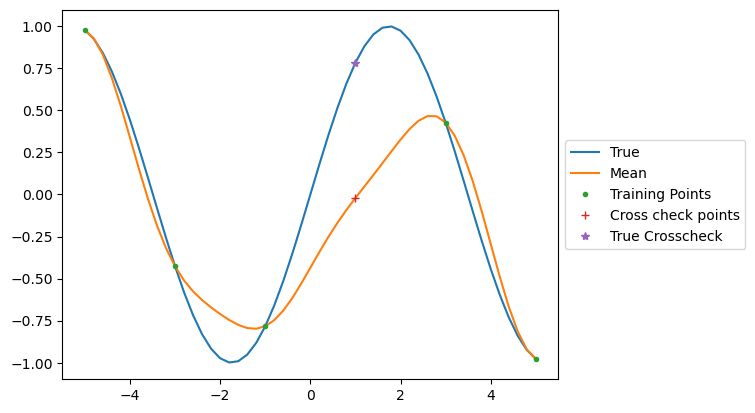

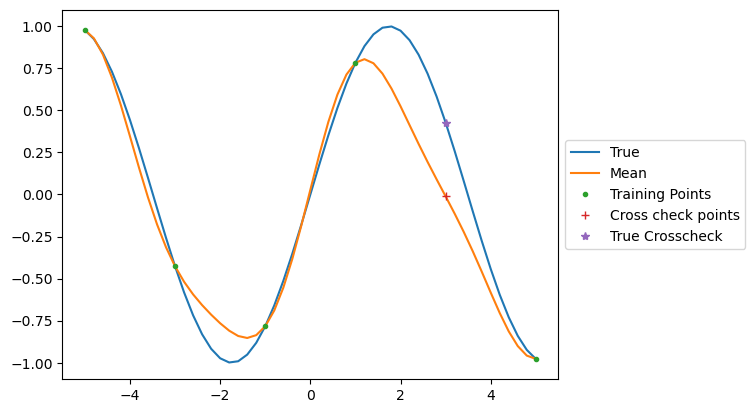

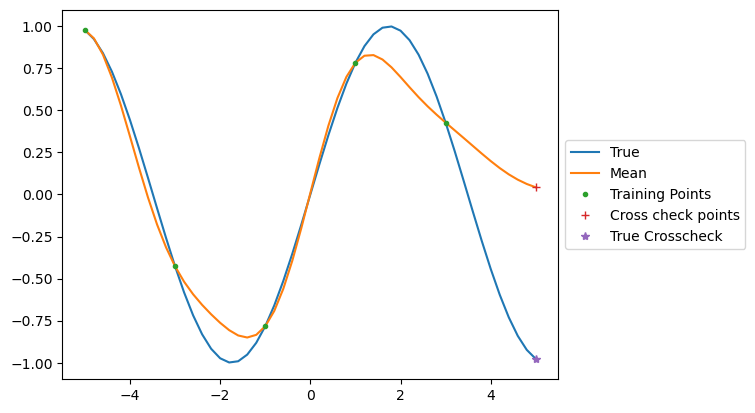

In [88]:
#Ntest = 100
Nobs = 6
n=10
Ncheck = 1
Ntrain = Nobs-Ncheck
i=0
while(i<Nobs):
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = np.linspace(-5,5,Ntest)
    xtest = []
    j=0
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    xcheck = np.array(xinit[i])
    xtrain = np.delete(xinit,i)
    mean,std = GPR(xtest,xtrain,Ntrain,1,1)
    plt.figure()
    plt.plot(xtest,f(xtest),label='True')
    plt.plot(xtest,mean,label = 'Mean')
    plt.plot(xtrain,f(xtrain),'.',label='Training Points')
    num = np.argwhere(xtest == xcheck).item()
    plt.plot(xtest[num],mean[num],'+',label='Cross check points')
    plt.plot(xinit[i],f(xinit[i]),'*',label='True Crosscheck')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    dif = np.abs(mean[num]-f(xcheck))
    print(dif)
    i+=1
#print(dif)

# Initially here I build a minimising L2 routine taking one data point out just as practice.
# Further down I build a routine taking 2 out for cross validation

## Minimising the vertical distance for all check points taken out
## Therefore finding a different optimal hyperperameter l for each point taken out

In [91]:
## This function finds the norm where one point is taken out
## Want to define a function to find the L2 norm at a point. ie removing a certain point
def L2normpoint(param,Nobs,Ncheck,pointindex):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = []
    dif = 0
    j=0
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    i=pointindex
    xcheck = np.array(xinit[i])
    xtrain = np.delete(xinit,i)
    num = np.argwhere(xtest == xcheck).item()
    mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
    dif = np.abs(mean[num]-f(xcheck))
    return dif

In [92]:
L2normpoint(1,6,1,0)

1.020040974783588

In [93]:
## We minimize the L2 norm at each iteration when removing different points for checking
initial_param = 1.0 

# FixME use ML algorithm to minimise

Nobs = 10   
Ncheck = 1 
pointindex = np.arange(0,10,1)

for pointindex in pointindex:
    result = minimize(L2normpoint, initial_param, args=(Nobs, Ncheck,pointindex), method="L-BFGS-B")
    l = result.x[0]
    print(f"Index removed = {pointindex}")
    print(f"L for minimised L2 norm = {l}")
    print(f"Resulting L2 norm = {L2normpoint(l,Nobs,Ncheck,pointindex)}\n")

Index removed = 0
L for minimised L2 norm = 1.8286336455133214
Resulting L2 norm = 2.3114061775686423e-09

Index removed = 1
L for minimised L2 norm = 1.0508172681283539
Resulting L2 norm = 1.2234839807945264e-09

Index removed = 2
L for minimised L2 norm = 3.6490902370089997
Resulting L2 norm = 0.0017420092459393688

Index removed = 3
L for minimised L2 norm = 3.1906390341182482
Resulting L2 norm = 1.9869890821588854e-07

Index removed = 4
L for minimised L2 norm = 3.598282078691069
Resulting L2 norm = 0.0006576971249321883

Index removed = 5
L for minimised L2 norm = 3.1830761232751326
Resulting L2 norm = 5.305504309160991e-06

Index removed = 6
L for minimised L2 norm = 3.537410262549494
Resulting L2 norm = 0.0008222135005128139

Index removed = 7
L for minimised L2 norm = 3.2129715211728707
Resulting L2 norm = 3.7358052096259087e-06

Index removed = 8
L for minimised L2 norm = 1.050817268128355
Resulting L2 norm = 1.2234835367053165e-09

Index removed = 9
L for minimised L2 norm = 

## Now minimising the total sum of the vertical distance
## Finding the optimal parameter for all points taken out

In [95]:
## This returns the summed distance when all points are removed. 
def L2norm(param,Nobs,Ncheck):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = []
    dif = 0
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    i=0
    while(i<Nobs):
        xcheck = np.array(xinit[i])
        xtrain = np.delete(xinit,i)
        num = np.argwhere(xtest == xcheck).item()
        ## running GPR on new xtrain without xcheck
        mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
        dif += np.abs(mean[num]-f(xcheck))
        i+=1
    return dif

In [96]:
## We minimize the summed distance 
initial_param = 1.0 

Nobs = 10   
Ncheck = 1 

result = minimize(L2norm, initial_param, args=(Nobs, Ncheck), method="L-BFGS-B")
l = result.x[0]
print(f"L for minimised L2 norm = {l}")
print(f"Resulting L2 norm average = {L2norm(l,Nobs,Ncheck)/Nobs}\n")

L for minimised L2 norm = 1.8286336455053978
Resulting L2 norm average = 0.012006001192548132



In [100]:
pointindex = np.arange(0,10,1)

for pointindex in pointindex:
    print(f"Index removed = {pointindex}")
    print(f"Resulting L2 norm = {L2normpoint(l,Nobs,Ncheck,pointindex)}\n")

Index removed = 0
Resulting L2 norm = 2.3151613959271344e-09

Index removed = 1
Resulting L2 norm = 0.026524574183294625

Index removed = 2
Resulting L2 norm = 0.015409640696134597

Index removed = 3
Resulting L2 norm = 0.00893164766957344

Index removed = 4
Resulting L2 norm = 0.009164141098614575

Index removed = 5
Resulting L2 norm = 0.009164141098622791

Index removed = 6
Resulting L2 norm = 0.008931647669535026

Index removed = 7
Resulting L2 norm = 0.015409640696115945

Index removed = 8
Resulting L2 norm = 0.026524574183291294

Index removed = 9
Resulting L2 norm = 2.3151376371544075e-09



In [101]:
def Sanitycheck(param,Nobs,Ncheck,pointindex):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = []
    j=0
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    i=pointindex
    xcheck = np.array(xinit[i])
    xtrain = np.delete(xinit,i)
    num = np.argwhere(xtest == xcheck).item()
    mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
    dif = np.abs(mean[num]-f(xcheck))
    return xtest,xtrain,xcheck,num,mean,std

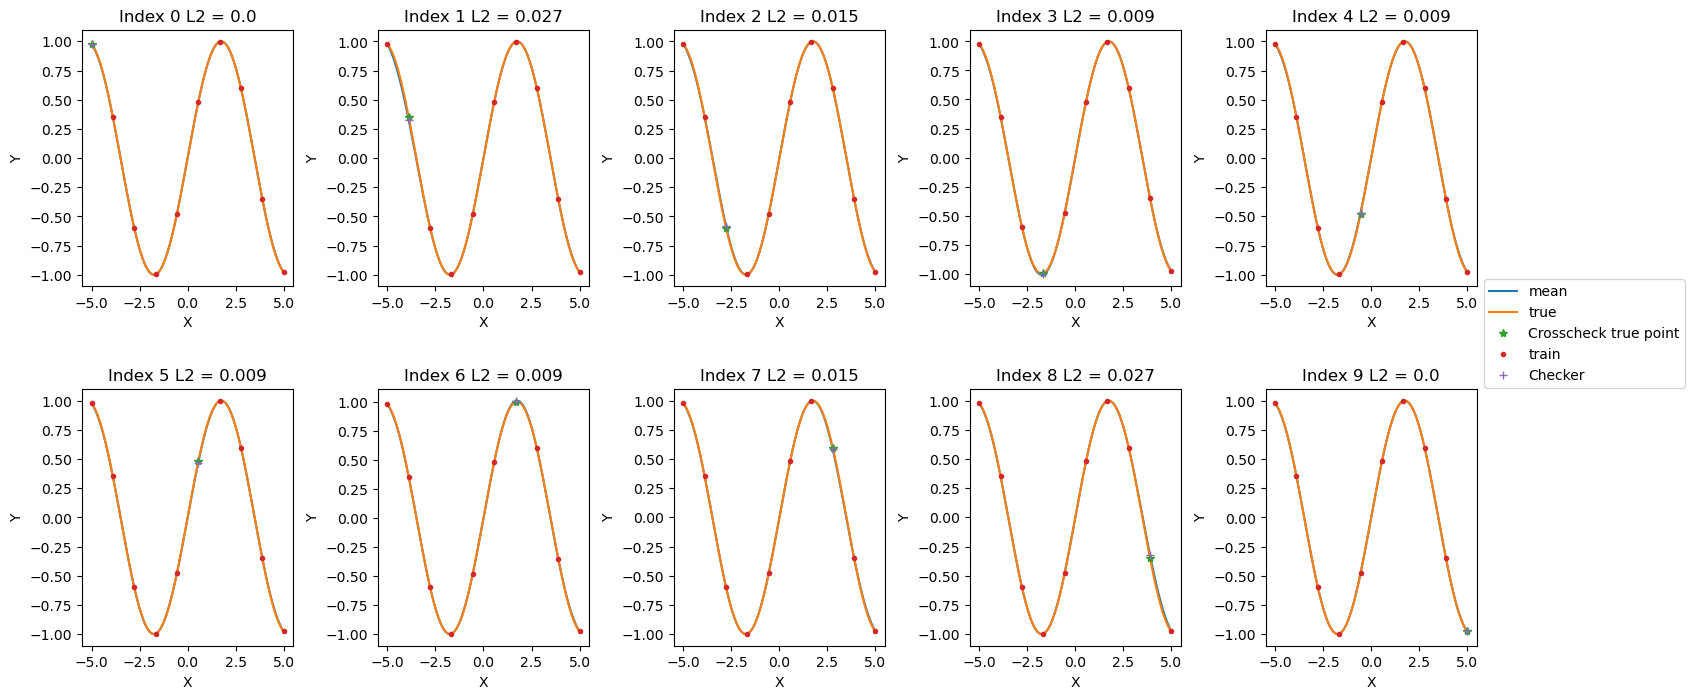

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
Nobs = 10
Ncheck = 1

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

# Loop over each index and plot in its respective subplot
for index in range(10):
    # Get xtest, xtrain, xcheck, checknum, mean0, std0 from Sanitycheck for the given index
    xtest, xtrain, xcheck, checknum, mean0, std0 = Sanitycheck(l, Nobs, Ncheck, index)

    # Determine subplot position (row, column)
    ax = axes[index // 5, index % 5]
    
    # Plot in the selected subplot
    ax.plot(xtest, mean0, label='mean')
    ax.plot(xtest, f(xtest), label='true')
    ax.plot(xcheck, f(xcheck), '*', label='Crosscheck true point')
    ax.plot(xtrain, f(xtrain), '.', label='train')
    ax.plot(xtest[checknum], mean0[checknum], '+', label='Checker')

    # Set title and labels for each subplot
    ax.set_title(f'Index {index} L2 = {round(L2normpoint(l,Nobs,Ncheck,index),3)}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    if (index == 0):
        fig.legend(loc='center left', bbox_to_anchor=(.9, 0.5))

# Move legend to the right outside the plots for a cleaner display
#fig.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.show()

## Here we observe that we get a large optimal length scale. I think this is because the end point skew the length scale to be large

### Keep the endpoints always and remove the internal points to reduce the optimal length scale

In [105]:
## This returns the summed distance when all points are removed. 
def L2norm(param,Nobs,Ncheck):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xinit= np.linspace(-5,5,Nobs)
    xtest = []
    dif = 0
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    i=1
    while(i<Nobs-1):
        xcheck = np.array(xinit[i])
        xtrain = np.delete(xinit,i)
        num = np.argwhere(xtest == xcheck).item()
        ## running GPR on new xtrain without xcheck
        mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
        dif += np.abs(mean[num]-f(xcheck))
        i+=1
    return dif

In [106]:
## We minimize the summed distance 
initial_param = 1.0 

Nobs = 10   
Ncheck = 1 

result = minimize(L2norm, initial_param, args=(Nobs, Ncheck), method="L-BFGS-B")
l = result.x[0]
print(f"L for minimised L2 norm = {l}")
print(f"Resulting L2 norm average = {L2norm(l,Nobs,Ncheck)/(Nobs-2)}\n")

L for minimised L2 norm = 1.5212915304194639
Resulting L2 norm average = 0.0049930597666356935



In [107]:
pointindex = np.arange(1,9,1)

for pointindex in pointindex:
    print(f"Index removed = {pointindex}")
    print(f"Resulting L2 norm = {L2normpoint(l,Nobs,Ncheck,pointindex)}\n")

Index removed = 1
Resulting L2 norm = 8.057637890246383e-11

Index removed = 2
Resulting L2 norm = 0.00572931380514119

Index removed = 3
Resulting L2 norm = 0.010650874193617432

Index removed = 4
Resulting L2 norm = 0.0035920509872083284

Index removed = 5
Resulting L2 norm = 0.0035920509872101047

Index removed = 6
Resulting L2 norm = 0.010650874193619209

Index removed = 7
Resulting L2 norm = 0.005729313805139857

Index removed = 8
Resulting L2 norm = 8.057304823338995e-11



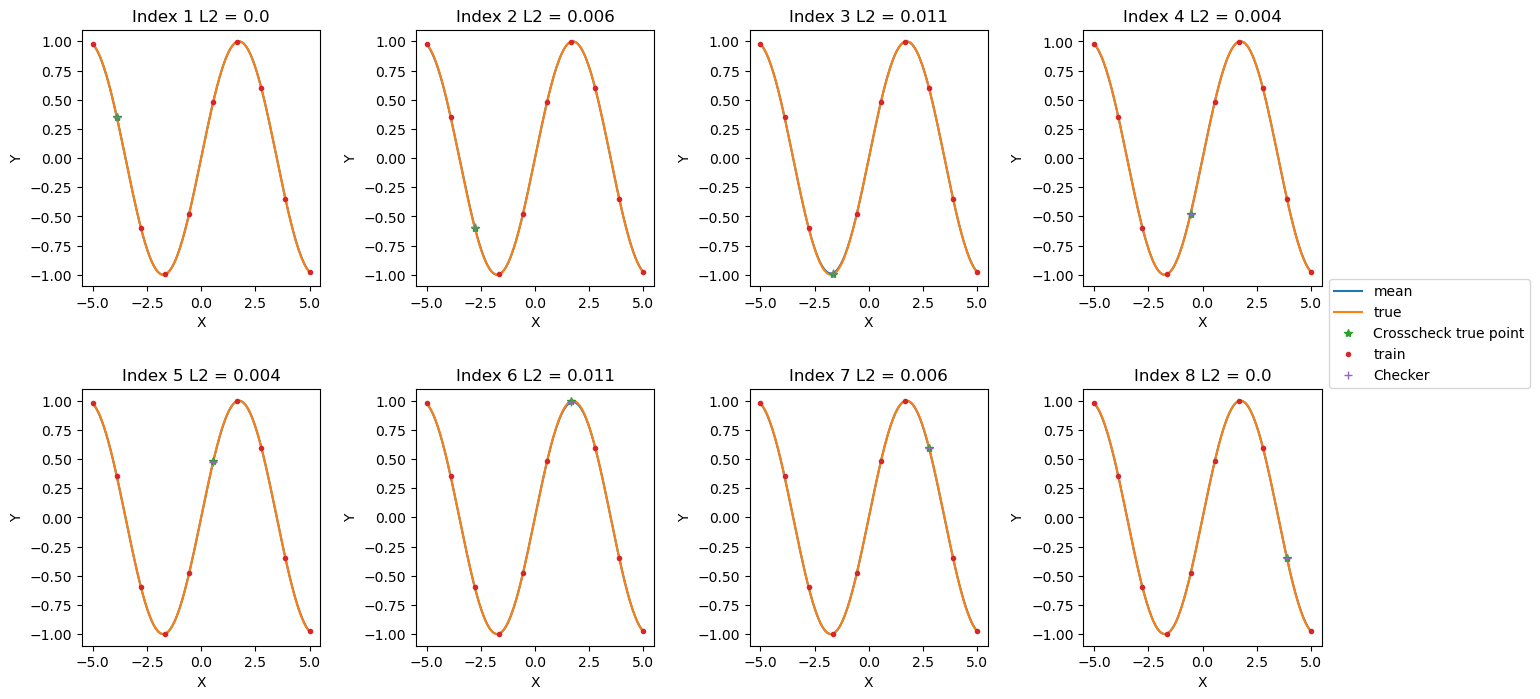

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
Nobs = 10
Ncheck = 1

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots

# Loop over each index from 1 to 8
for idx, index in enumerate(range(1, 9)):  # Updated to plot from index 1 to 8
    # Get xtest, xtrain, xcheck, checknum, mean0, std0 from Sanitycheck for the given index
    xtest, xtrain, xcheck, checknum, mean0, std0 = Sanitycheck(l, Nobs, Ncheck, index)

    # Determine subplot position (row, column) based on idx
    ax = axes[idx // 4, idx % 4]

    # Plot in the selected subplot
    ax.plot(xtest, mean0, label='mean')
    ax.plot(xtest, f(xtest), label='true')
    ax.plot(xcheck, f(xcheck), '*', label='Crosscheck true point')
    ax.plot(xtrain, f(xtrain), '.', label='train')
    ax.plot(xtest[checknum], mean0[checknum], '+', label='Checker')

    # Set title and labels for each subplot
    ax.set_title(f'Index {index} L2 = {round(L2normpoint(l, Nobs, Ncheck, index), 3)}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    if (index ==1):
        fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))

# Add a single legend outside of the plots to the right

plt.show()


# Now trying to do this with taking two points out as cross check points 
## I will leave the endpoints as i did last time. Therefore we have 8 choose 2 combinations. This is 28 combinations

In [128]:
## This returns the summed distance when all points are removed. 
def L2norm(param,Nobs,Ncheck):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xtest = []
    xinit= np.linspace(-5,5,Nobs)
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    js = np.arange(1, Nobs - 1, dtype=int)
    pairs = np.array(list(combinations(js, Ncheck)))
    N = len(pairs)
    count = 0
    dif=0
    while(count<N):
        xcheck = []
        i = pairs[count,0]
        j = pairs[count,1]
        xcheck.append(xinit[i])
        xcheck.append(xinit[j])
        num = np.array([np.argwhere(xtest == xcheck[0]).item(),np.argwhere(xtest == xcheck[1]).item()])
        xtrain = np.delete(xinit,[i,j])
        mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
        dif += 0.5*np.sqrt((mean[num[0]]-f(xcheck[0]))**2+(mean[num[1]]-f(xcheck[1]))**2)
        count+=1
    return dif
L2norm(3.2244,10,2)
## FIXME  1/Ncheck replace 0.5 

0.1102434795946559

In [111]:
## This returns the summed distance when just one pair of points removed 
def L2normindividual(param,Nobs,Ncheck,pair):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xtest = []
    xinit= np.linspace(-5,5,Nobs)
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    count = 0
    dif=0
    xcheck = []
    i = pair[0]
    j = pair[1]
    xcheck.append(xinit[i])
    xcheck.append(xinit[j])
    num = np.array([np.argwhere(xtest == xcheck[0]).item(),np.argwhere(xtest == xcheck[1]).item()])
    xtrain = np.delete(xinit,[i,j])
    mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
    dif = 0.5*np.sqrt((mean[num[0]]-f(xcheck[0]))**2+(mean[num[1]]-f(xcheck[1]))**2)
    return dif

In [112]:
## Just for Graphing purposes
def SanityCheck2(param,Nobs,Ncheck,pair):
    l = param
    sigma = 1 ### variance
    n=10
    Ntrain = Nobs-Ncheck
    # Number of observations - check points
    Ntest = int((Nobs-1)*n+1)
    xtest = []
    xinit= np.linspace(-5,5,Nobs)
    j=0
    # This is to make sure xtest contains the exact x training values
    while(j<Nobs-1):
        if (j==Nobs-2):
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5)+1,endpoint=True))
        else:
            xtest.append(np.linspace(xinit[j],xinit[j+1],int((Ntest-1)/5),endpoint=False))
        j+=1
    xtest = np.concatenate(xtest)
    count = 0
    dif=0
    xcheck = []
    i = pair[0]
    j = pair[1]
    xcheck.append(xinit[i])
    xcheck.append(xinit[j])
    xcheck = np.array(xcheck)
    num = np.array([np.argwhere(xtest == xcheck[0]).item(),np.argwhere(xtest == xcheck[1]).item()])
    xtrain = np.delete(xinit,[i,j])
    mean,std = GPR(xtest,xtrain,Ntrain,sigma,l)
    dif = 0.5*np.sqrt((mean[num[0]]-f(xcheck[0]))**2+(mean[num[1]]-f(xcheck[1]))**2)
    return xtest,xtrain,xcheck,mean,std

In [113]:
## We minimize the summed distance 
initial_param = 1.0 

Nobs = 10   
Ncheck = 2 

result = minimize(L2norm, initial_param, args=(Nobs, Ncheck), method="L-BFGS-B")
l = result.x[0]
print(f"L for minimised L2 norm = {l}")
print(f"Resulting L2 norm average = {L2norm(l,Nobs,Ncheck)/28}\n")
## divide by 28 the number of pairs

L for minimised L2 norm = 1.8619686338887704
Resulting L2 norm average = 0.011171941273921038



In [66]:
# pair = [3,6]
# xtest,xtrain,xcheck,mean,std = SanityCheck2(l,Nobs,Ncheck,pair)
# plt.figure(figsize=(10, 6))
# plt.plot(xtest,mean,label='mean')
# plt.plot(xtest, f(xtest), 'r:', label="True function")
# plt.plot(xtrain,f(xtrain),'+',label='true')
# plt.plot(xcheck,f(xcheck),'*',label = 'Crosscheck')
# plt.title(f"length scale={round(l,4)}, points removed = {pair}, L2norm = {round(dist,4)}")
# plt.fill_between(xtest,mean - 2 * std,mean + 2 * std,color='lightblue',alpha=0.3,label='±2 Standard Deviation')
# plt.legend()

In [67]:
js = np.arange(1, Nobs - 1, dtype=int)
pairs = np.array(list(combinations(js, Ncheck)))
N = len(pairs)
normdist = np.zeros(N)
i=0
for pair in pairs:
    dist = L2normindividual(l,Nobs,Ncheck,pair)
    normdist[i] = dist
    i+=1
    #print(f"index = {pair}\n L2norm = {dist}\n")  
minindex = np.argmin(normdist)
pair = pairs[minindex]
dist = normdist[minindex]
pair

array([3, 6])

In [77]:
  ## We minimize the summed distance 
initial_param = 1.0 

Nobs = 10   
Ncheck = 2 
pair = pairs[minindex]

result = minimize(L2normindividual, initial_param, args=(Nobs, Ncheck,pair), method="L-BFGS-B")
l = result.x[0]
print(f"L for minimised L2 norm = {l}")
print(f"Resulting L2 norm average = {L2normindividual(l,Nobs,Ncheck,pair)}\n")

L for minimised L2 norm = 1.8449757249648941
Resulting L2 norm average = 0.0015574353581503482



[-5.         -3.88888889 -2.77777778 -0.55555556  0.55555556  2.77777778
  3.88888889  5.        ]


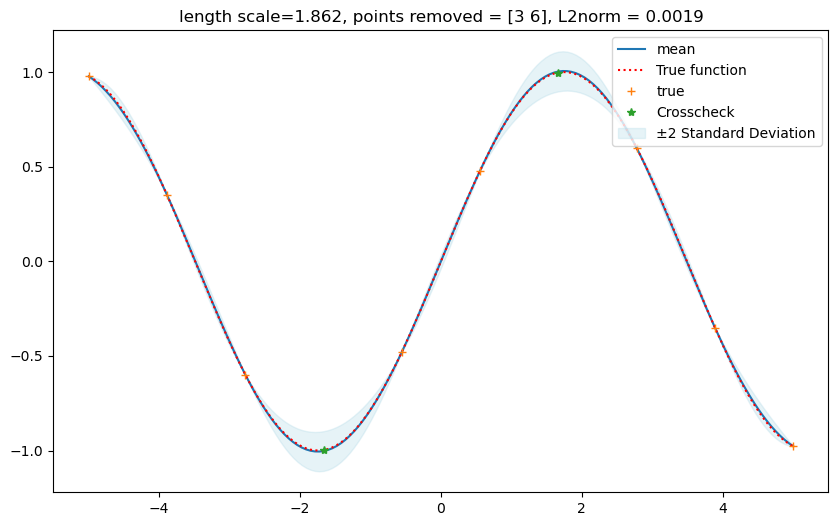

In [130]:
xtest,xtrain,xcheck,mean,std = SanityCheck2(l,Nobs,Ncheck,pair)
print(xtrain)
plt.figure(figsize=(10, 6))
plt.plot(xtest,mean,label='mean')
plt.plot(xtest, f(xtest), 'r:', label="True function")
plt.plot(xtrain,f(xtrain),'+',label='true')
plt.plot(xcheck,f(xcheck),'*',label = 'Crosscheck')
plt.title(f"length scale={round(l,4)}, points removed = {pair}, L2norm = {round(dist,4)}")
plt.fill_between(xtest,mean - 2 * std,mean + 2 * std,color='lightblue',alpha=0.3,label='±2 Standard Deviation')
plt.legend()

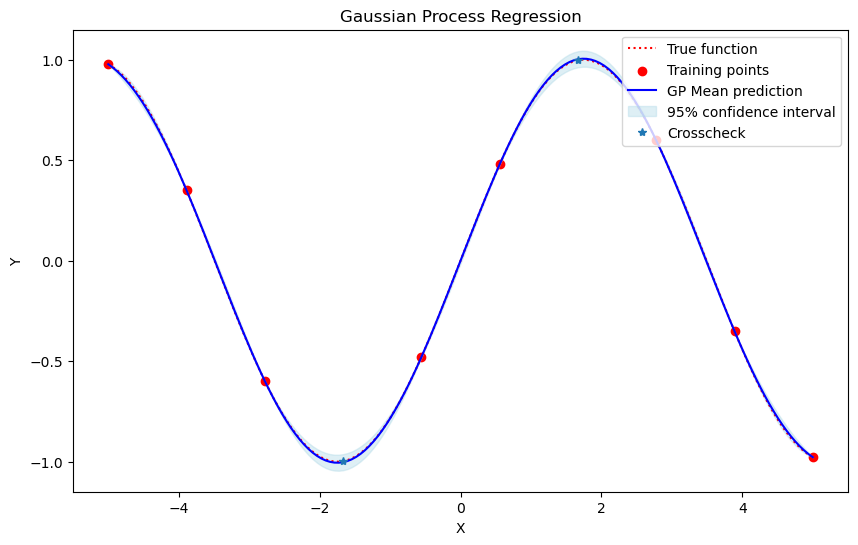

Optimal length scale parameter: 2.187043031700807


In [81]:
xtest = xtest.reshape(-1,1)
xtrain = xtrain.reshape(-1,1)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)#, alpha=0.1**2)
gp.fit(xtrain, f(xtrain))
y_pred, sigma = gp.predict(xtest, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(xtest, f(xtest), 'r:', label="True function")
plt.scatter(xtrain, f(xtrain), c='r', label="Training points")
plt.plot(xtest, y_pred, 'b-', label="GP Mean prediction")
plt.fill_between(xtest.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.4, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Process Regression")
plt.plot(xcheck,f(xcheck),'*',label = 'Crosscheck')
plt.legend()
plt.show()

optimal_length_scale = gp.kernel_.k2.length_scale
print(f"Optimal length scale parameter: {optimal_length_scale}")

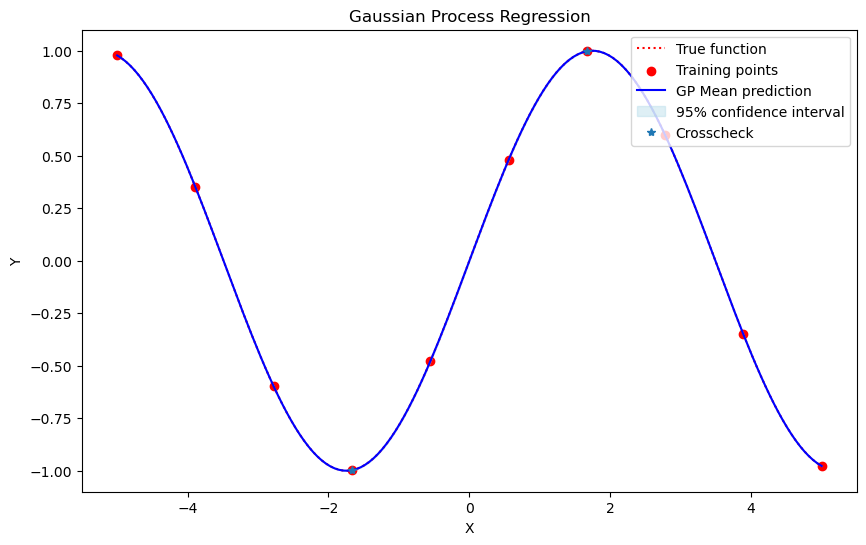

Optimal length scale parameter: 3.224464797482445


In [42]:
xtrain = np.linspace(-5,5,10).reshape(-1,1)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)#, alpha=0.1**2)
gp.fit(xtrain, f(xtrain))
y_pred, sigma = gp.predict(xtest, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(xtest, f(xtest), 'r:', label="True function")
plt.scatter(xtrain, f(xtrain), c='r', label="Training points")
plt.plot(xtest, y_pred, 'b-', label="GP Mean prediction")
plt.fill_between(xtest.ravel(), y_pred - 2 * sigma, y_pred + 2 * sigma, color="lightblue", alpha=0.4, label="95% confidence interval")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gaussian Process Regression")
plt.plot(xcheck,f(xcheck),'*',label = 'Crosscheck')
plt.legend()
plt.show()

optimal_length_scale = gp.kernel_.k2.length_scale
print(f"Optimal length scale parameter: {optimal_length_scale}")